In [1]:
using XSim,JWAS, DataFrames

In [2]:
srand(314);

In [3]:
using XSim

In [4]:
nind     = 100   
chrLength= 1.0  #length of each chromosome 
numChr   = 10   #number of chromosomes
nmarkers = 2000 #number of loci for each chromosome
nQTL     = 100  #number of QTL for each chromosome

100

In [5]:
build_genome(numChr,chrLength,nmarkers,nQTL)

In [6]:
popSizeFounder = nind
sires = sampleFounders(popSizeFounder);
dams  = sampleFounders(popSizeFounder);

Sampling 100 animals into base population.
Sampling 100 animals into base population.


In [7]:
ngen,popSize = 10,nind
sires1,dams1,gen1 = sampleRan(popSize, ngen, sires, dams);

Generation     2: sampling    50 males and    50 females
Generation     3: sampling    50 males and    50 females
Generation     4: sampling    50 males and    50 females
Generation     5: sampling    50 males and    50 females
Generation     6: sampling    50 males and    50 females
Generation     7: sampling    50 males and    50 females
Generation     8: sampling    50 males and    50 females
Generation     9: sampling    50 males and    50 females
Generation    10: sampling    50 males and    50 females
Generation    11: sampling    50 males and    50 females


In [8]:
animals=concatCohorts(sires1,dams1);

In [9]:
M = getOurGenotypes(animals);

In [10]:
P = getOurPhenVals(animals,1.0); #residual variance is 1.0
nothing

### writeout

In [11]:
phenotypes = DataFrame()
phenotypes[:y]=P;

In [12]:
writetable("phenotypes.csv",phenotypes)

In [13]:
writedlm("genotype.csv",M)

## JWAS

In [14]:
M=readdlm("genotype.csv");
phenotypes=readtable("phenotypes.csv");
nothing

In [15]:
R=1.0
model_equations = "y = intercept";
model = build_model(model_equations,R);

G=0.01
add_markers(model,M,G,header=false,G_is_marker_variance=true);

@time out=runMCMC(model,phenotypes,Pi=0.95,estimatePi=true,chain_length=100,
printout_frequency=20,printout_MCMCinfo=true,methods="BayesC",
output_samples_frequency=10);

20000 markers on 100 individuals were added.
MCMC Information:

methods                                      BayesC
chain_length                                    100
starting_value                                false
printout_frequency                               20
output_samples_frequency                         10
constraint                                    false
missing_phenotypes                            false
update_priors_frequency                           0

Information for hyper-parameter: π (Π)
π                                              0.95
estimatePi                                     true

Degree of freedom for hyper-parameters:
residual variances:                           4.000
iid random effect variances:                  4.000
polygenic effect variances:                   4.000
marker effect variances:                      4.000





running MCMC for BayesC... 14%|████                     |  ETA: 0:00:05


Posterior means at iteration: 20
Residual variance: 

running MCMC for BayesC... 18%|████                     |  ETA: 0:00:04

0.34606
Marker effects variance: 0.271262
π: 0.92


running MCMC for BayesC... 31%|████████                 |  ETA: 0:00:03


Posterior means at iteration: 40
Residual variance: 0.338365
Marker effects variance: 0.35313
π: 0.929


running MCMC for BayesC... 55%|██████████████           |  ETA: 0:00:02


Posterior means at iteration: 60
Residual variance: 0.34726
Marker effects variance: 0.410937
π: 0.934


running MCMC for BayesC... 75%|███████████████████      |  ETA: 0:00:01


Posterior means at iteration: 80
Residual variance: 0.378563
Marker effects variance: 0.47277
π: 0.938


running MCMC for BayesC... 95%|████████████████████████ |  ETA: 0:00:00


Posterior means at iteration: 100
Residual variance: 0.50035
Marker effects variance: 0.53842
π: 0.941


running MCMC for BayesC...100%|█████████████████████████| Time: 0:00:03


 10.836132 seconds (13.00 M allocations: 611.979 MB, 2.98% gc time)


In [16]:
using JWAS:misc

In [17]:
A=GWAS("MCMC_samples_for_marker_effects.txt",model,header=false,
window_size=10,threshold=0.01);

In [18]:
using Plots

In [21]:
pyplot()

Plots.PyPlotBackend()


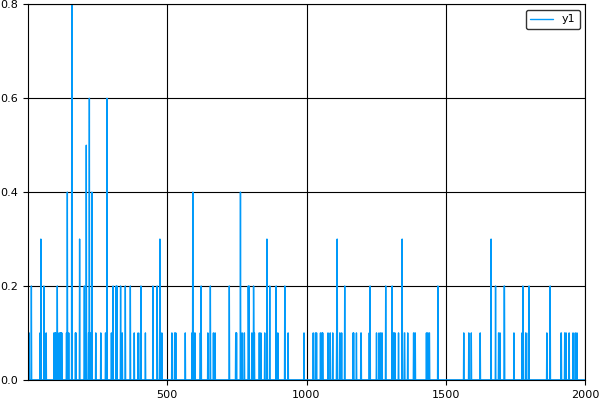

In [22]:
plot(A)